# Transformers


- Encoder & Decoder
- Self-attention mechanism
- Muti-Head Attention
- Layer Normalization
- Feedforward neural network
- Residual connection
- Positional Encoding (not covered)

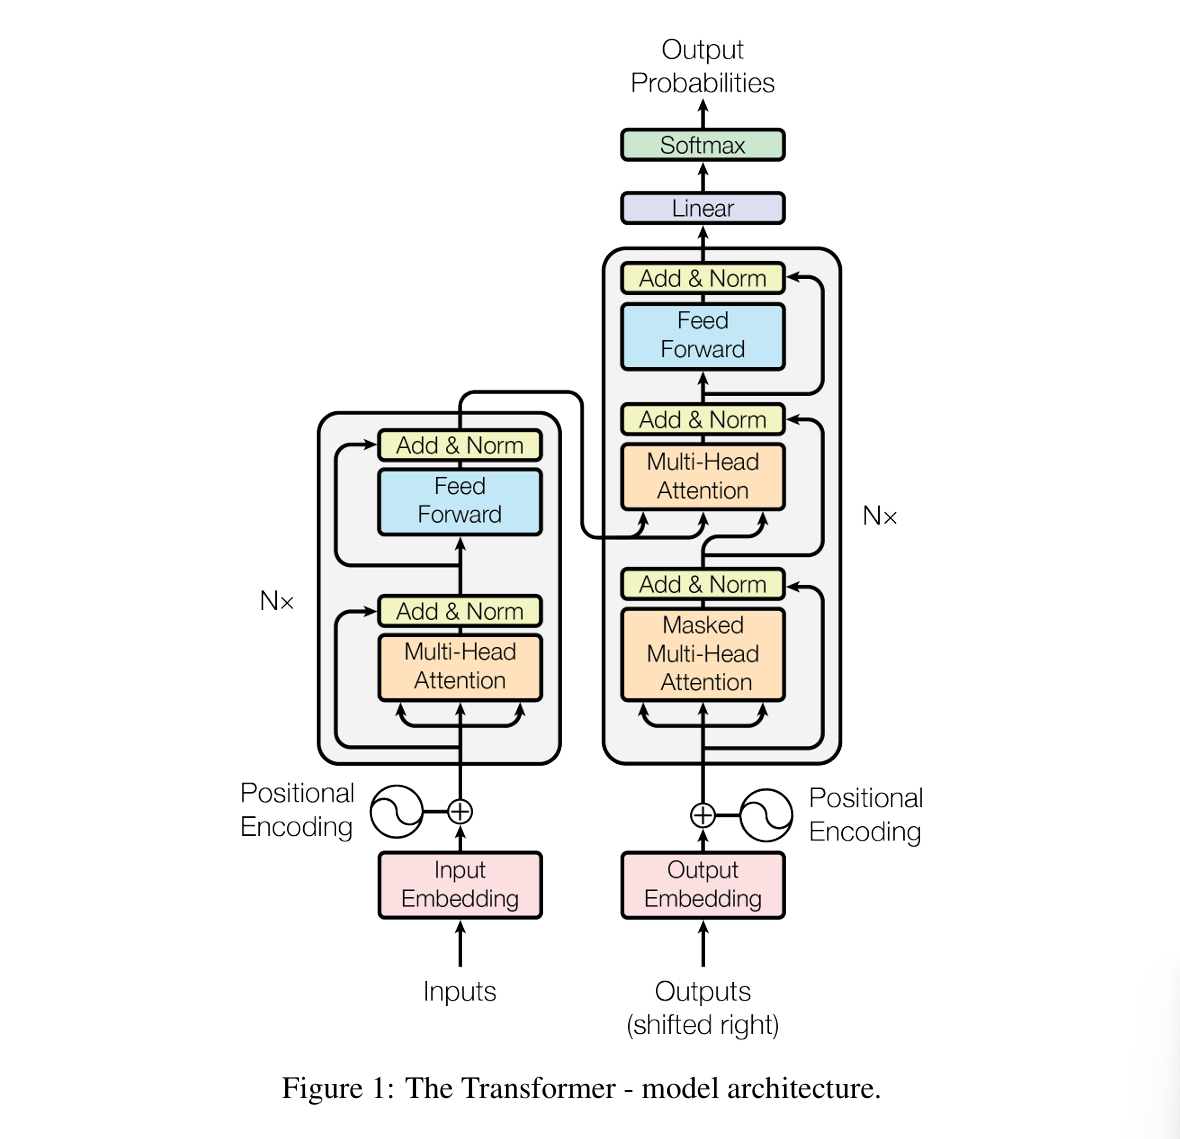

# 1 Self-attention 自注意力机制

Enables each input word to attent to every other word - capture contexts and relationships more effectively.

Each word will be captured by 3 vectors:
- Query
- Key
- Value

**Scaled Dot-Product Attention**

**Attention Score** = `Softmax(Query * Key  / sqrt(modelsize))`
- Dot product of query and key
- Used to weigh the value vectors (Attention_score * Value)
- allows the model to focus on different parts of the input sequence when making predictions.

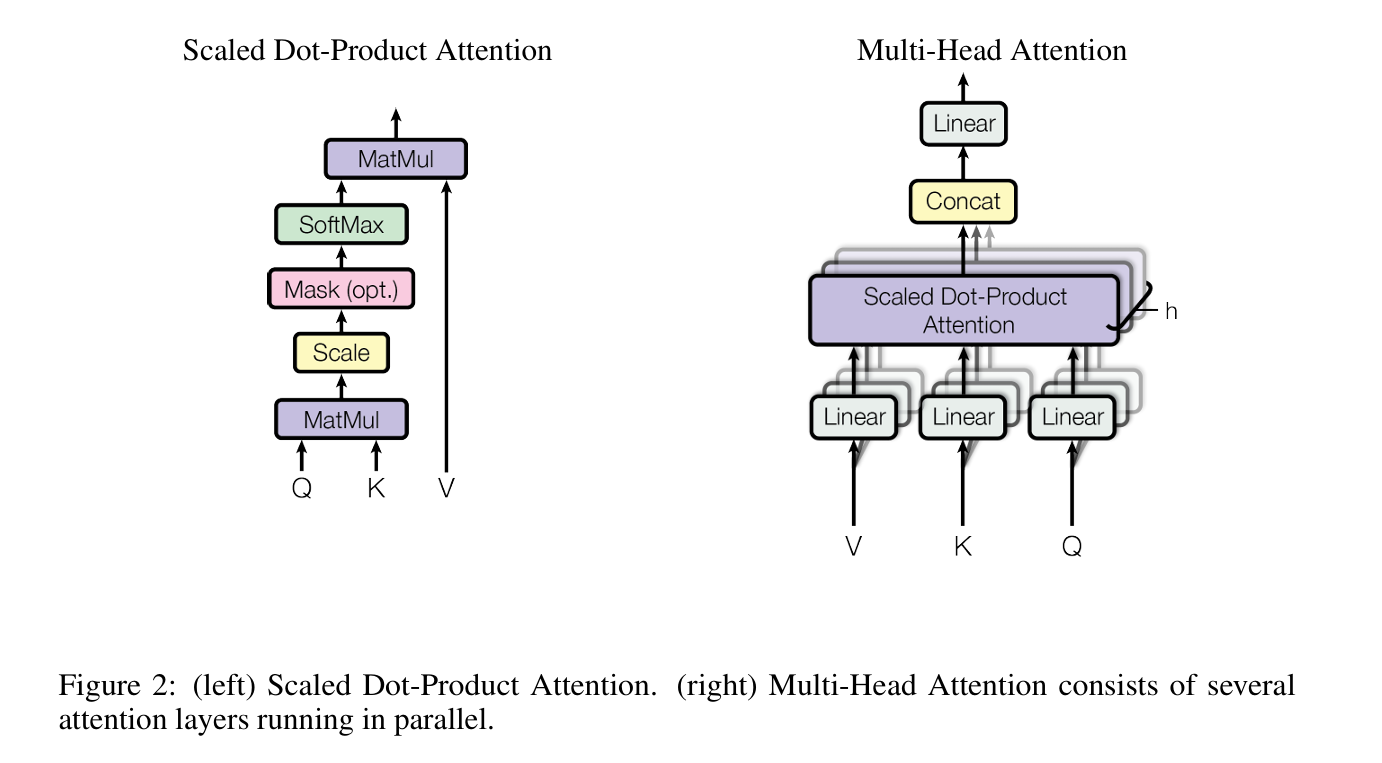

In [2]:
# An example

import tensorflow as tf
from tensorflow.keras.layers import Layer

# Define the Self-Attention mechanism
class SelfAttention(Layer):
    def __init__(self, d_model):
        super(SelfAttention, self).__init__()
        self.d_model = d_model
        # Dense layers for Q, K, V projections
        self.query_dense = tf.keras.layers.Dense(d_model)
        self.key_dense = tf.keras.layers.Dense(d_model)
        self.value_dense = tf.keras.layers.Dense(d_model)

    def call(self, inputs):
        # Compute the attention weights and apply them to the value vectors to get the output
        q = self.query_dense(inputs)
        k = self.key_dense(inputs)
        v = self.value_dense(inputs)
        # Attention scores = Softmax(Q * K^T / sqrt(d_model))
        # where d_k is the dimension of the key vectors
        attention_weights = tf.nn.softmax(tf.matmul(q, k, transpose_b=True) / tf.math.sqrt(tf.cast(self.d_model, tf.float32)), axis=-1)
        output = tf.matmul(attention_weights, v)
        return output

# Example usage
inputs = tf.random.uniform((1, 60, 512)) # Batch size of 1, sequence length of 60, and embedding dimension of 512
self_attention_layer = SelfAttention(d_model=512)
output = self_attention_layer(inputs)
print("Output shape:", output.shape)  # Should be (1, 60, 512)



Output shape: (1, 60, 512)


# 2 Encoder

In [3]:
# An examle
import tensorflow as tf
from tensorflow.keras.layers import Layer

# Define a Transformer Encoder
class TransformerEncoder(Layer):
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super(TransformerEncoder, self).__init__()
        
        # Multi-head self-attention: applied to the input sequence
        self.mha = tf.keras.layers.MultiHeadAttention(num_heads=8, key_dim=d_model)  # need to define d_model

        # Feed-forward network: applied to the output of the self-attention layer
        self.ffn = tf.keras.Sequential([
            tf.keras.layers.Dense(dff, activation='relu'),  # dff is the dimension of the feed-forward network
            tf.keras.layers,Dense(d_model)
        ])

        # Layer normalization: applied after the self-attention and feed-forward layers
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        # Dropout: applied after the self-attention, feed-forward and normalization layers
        self.dropout1 = tf.keras.layers.Dropout(0.1)
        self.dropout2 = tf.keras.layers.Dropout(0.1)


    def call():
        # Masked Multi-head Self-attention
        attn_output = self.mha(x, x, x, attention_mask=mask)
        # Dropout 1
        attn_output = self.dropout1(attn_output, training=training)
        # Add & Norm 1: residual connection and layer normalization
        out1 = self.layernorm1(x + attn_output)

        # Feed-forward network
        ffn_output = self.ffn(out1)
        # Dropout 2
        ffn_output = self.dropout2(ffn_output, training=training)
        # Add & Norm 2: residual connection and layer normalization
        out2 = self.layernorm2(out1 + ffn_output)

        return

# 3 Decoder


Similar to encoder, but
- additoinal cross-attention mechanism to attend to the encoders output
  - generate sequences based on the context provided by the encoder

Decoder takes the **target sequence** as input, applies self-attention and cross-attention with the **encoders output**, and then passes through a feed forward neural network.

In [4]:
# An example

# Define a Transformer Decoder
class TransformerDecoder(Layer):
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super(TransformerDecoder, self).__init__()
        
        # Multi-head self-attention: 
        # applied to the target sequence (input in this part) and the output of the encoder
        self.mha1 = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=d_model)
        self.mha2 = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=d_model)

        # Feed-forward network
        self.ffn = tf.keras.Sequential([
            tf.keras.layers.Dense(dff, activation='relu'),
            tf.keras.layers.Dense(d_model)
        ])

        # Residual connection & Layer Normalization
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm3 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)
        
    def call(self, x, 
             enc_output,  # output of the encoder
             training,    # training or not
             look_ahead_mask,  # mask for the target sequence
             padding_mask):    # mask for the encoder output
        
        # Masked self attention - on Target Sequence
        # Note: Masked here: attention_mask=look_ahead_mask
        attn1 = self.mha1(x, x, x, attention_mask=look_ahead_mask)    
        # Dropout
        attn1 = self.dropout1(attn1, training=training) 
        # Add & Norm: Residual connection & Layer Normalization
        out1 = self.layernorm1(x + attn1)

        # Cross attention - Encoder output & Target Sequence attention
        attn2 = self.mha1(out1, enc_output, enc_output, attention_mask=padding_mask)    
        # Dropout
        attn2 = self.dropout1(attn1, training=training) 
        # Add & Norm: Residual connection & Layer Normalization
        out2 = self.layernorm1(out1 + attn2)

        # Feed-forward network
        ffn_output = self.ffn(out2)
        ffn_output = self.dropout3(ffn_output, training=training)
        # Add & Norm
        out3 = self.layernorm3(out2 + ffn_output)

        return out3


---

# Transformers for Text Generation
 

- Implement Transformers for text generation tasks
- Build, train, and evaluate Transformer models for text generation using TensorFlow and Keras
- Apply text generation in real-world scenarios

## 1. Set up environment
- Import libraries: TensorFlow, Pandas, NumPy, Sklearn, **TextVectorization**
- Load the dataset, preprocess the dataset of training
  - Build a vocabulary from the text
  - Convert the text into a sequence of integers （文本向量化层）
  - Prepare the dataset for adaption
  - Adapt the vectorizer 适配向量化层
  - Vectorize the text  将文本向量化（文本向量化层）

In [5]:
import tensorflow as tf 
import numpy as np 
from tensorflow.keras.layers import TextVectorization 
from tensorflow.keras.utils import get_file 

In [6]:
# Load the dataset 
path_to_file = get_file('shakespeare.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt') 
text = open(path_to_file, 'rb').read().decode(encoding='utf-8') 

# Preview the dataset 
print(text[:1000]) 

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

All:
We know't, we know't.

First Citizen:
Let us kill him, and we'll have corn at our own price.
Is't a verdict?

All:
No more talking on't; let it be done: away, away!

Second Citizen:
One word, good citizens.

First Citizen:
We are accounted poor citizens, the patricians good.
What authority surfeits on would relieve us: if they
would yield us but the superfluity, while it were
wholesome, we might guess they relieved us humanely;
but they think we are too dear: the leanness that
afflicts us, the object of our misery, is as an
inventory to particularise their abundance; our
sufferance is a gain to them Let us revenge this with
our pikes, ere we become rakes: for the gods know I
speak this in hunger for bread, not in thirst for revenge.



In [7]:
# Preprocess the dataset 
vocab_size = 10000   # Limit the vocab to 10,000 most frequent words
seq_length = 100     # Intented sequence length for later batching

# Adapt TextVectorization to full text 
vectorizer = TextVectorization(max_tokens=vocab_size, output_mode='int')  
text_ds = tf.data.Dataset.from_tensor_slices([text]).batch(1) 
vectorizer.adapt(text_ds) 

# Vectorize the text 
vectorized_text = vectorizer([text])[0] 
print("Vectorized text shape:", vectorized_text.shape) 
print("First 10 vectorized tokens:", vectorized_text.numpy()[:10]) 

Vectorized text shape: (202646,)
First 10 vectorized tokens: [ 89 270 138  36 982 144 673 125  16 106]


Step-by-step explanation:
1. Set parameters:
   - `vocab_size = 10000`: Limits the vocabulary to the 10,000 most frequent words.
   - `seq_length = 100`: Intended sequence length for later batching (not used directly in this cell).
2. Create a TextVectorization layer:
   - `vectorizer = TextVectorization(...)`: This Keras layer will convert text into sequences of integer tokens.
3. Prepare the dataset for adaptation:
   - `text_ds = tf.data.Dataset.from_tensor_slices([text]).batch(1)`: Wraps the entire text as a   single-element dataset for the vectorizer to learn the vocabulary.
4. Adapt the vectorizer:
   - `vectorizer.adapt(text_ds)`: The vectorizer scans the text to build its vocabulary.
5. Vectorize the text:
   - `vectorized_text = vectorizer([text])[0]`: Converts the text into a sequence of integer tokens.
6. Print results:
   - Prints the shape of the vectorized text and the first 10 tokens as integers.

## 2. Create input and target sequences
- Define a function to generate input and target sequences 生成input和target序列的func
- Split the text data into sequences of the specified length 把文本按特定长度分割开
- Convert the seq into TensorFlow tensors for training 把序列转换成张量用于训练

In [8]:
# Define a function to generate input and target sequences
def create_sequences(text, seq_length): 
    input_seqs = [] 
    target_seqs = [] 
    
    for i in range(len(text) - seq_length):    # seq_length = 100 
        input_seq = text[i:i + seq_length] 
        target_seq = text[i + 1:i + seq_length + 1] 
        input_seqs.append(input_seq) 
        target_seqs.append(target_seq) 
    return np.array(input_seqs), np.array(target_seqs) 

# Generate sequences 
X, Y = create_sequences(vectorized_text.numpy(), seq_length) 


这个函数`create_sequences`：
- 把已经**向量化（整数编码）后的长文本序列**，切分成一组长度为*seq_length*的**input输入序列及target目标序列**，用预训练模型
- **循环切分**：从头到尾，滑动窗口，每次取出长度为 seq_length 的一段作为 input_seq，它后面紧跟着的同样长度的一段作为 target_seq（其实就是 input_seq 向后平移一位）
- 最后得到：input_seq，target_seq

In [9]:
# Check if sequences are correctly generated 
print("Number of sequences generated:", len(X)) 
print("Sample input sequence:", X[0] if len(X) > 0 else "No sequences generated") 

# Check if X and Y are not empty 
assert X.size > 0, "Input data X is empty" 
assert Y.size > 0, "Target data Y is empty" 
X = tf.convert_to_tensor(X) 
Y = tf.convert_to_tensor(Y) 
print("Shape of X:", X.shape) 
print("Shape of Y:", Y.shape)

Number of sequences generated: 202546
Sample input sequence: [  89  270  138   36  982  144  673  125   16  106   34  106  106   89
  270    7   41   34 1286  344    4  200   64    4 3690   34 1286 1286
   89  270   89    7   93 1187  225   12 2442  592    4    2  307   34
   36 2655   36 2655   89  270   72   79  506   27    3   56   24 1390
   57   40  161 2328  644    9 4980   34   32   54 2863  885   72   17
   18  163  146  146  165  270   74  218   46  595   89  270   36   41
 6739  172  595    2 1780   46   29 1323 5151   47   58 4151   79   39
   60   58]
Shape of X: (202546, 100)
Shape of Y: (202546, 100)


## 3. Build the Transformer model
- Define the `TransformerBlock`
  - **MHA: Multi-Head Attention 多头注意力机制**：让每个位置的token都能关注（加权）序列中其它所有位置的信息，从而捕捉全局依赖关系。
  - **FFN: Feedforward network 前馈神经网络**：对每个位置的表示做非线性变换，提升模型表达能力。
  - **Residual + LayerNorm & Dropout 残差链接，层归一化，Dropout**
- Define the `TransformerModel`
  - **Embedding 嵌入层**： 把输入的token id转为向量
  - **Positional Encoding 位置编码**：给每个序列位置加上唯一的向量，帮助模型感知顺序
  - **Multiple Transformer blocks**：上面定义的Block
  - **Dense output layer**：最后的输出层，把每个位置的向量映射回词表大小，用于预测下一个token
- Compile the model:
  - Optimizer: Adam
  - Loss: sparse categorical cross-entropy

In [10]:
from tensorflow.keras.layers import Embedding, MultiHeadAttention, Dense, LayerNormalization, Dropout
from tensorflow.keras.models import Model

class TransformerBlock(tf.keras.layers.Layer):
    """
    Components:
     - MHA
     - FNN (2 fully-connected layer)
     - Layer norm x 2
     - Dropout x 2

    Architecture:
        inputs -> MHA -> Dropout -> Add & Norm (input+MHAdropout) = *out1*
            --> FFN -> Dropout -> Add & Norm (FFN dropout outputs + *out1*) 
        => outputs
    """

    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = tf.keras.Sequential([
            Dense(ff_dim, activation="relu"),
            Dense(embed_dim),
        ])
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, inputs, training=False):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)


`TransformerBlock`是模型里实现了**基本的encoder-decoder sublayer**的一个类，核心子层（MHA+FFN+Resid&Norm）在这里定义。

注意：这里没有实现掩码mask的部分
- 标准transformer
  - Encoder: 通常**不需要mask**，因为每个位置都可以看全部输入
  - Decoder: 训练时**需要mask (look-ahead mask**)，防止模型看到未来信息
- 这里的实现是通用的encoder结构，面向通用场景，默认不加mask，适合大多数文本编码任务
- 如果要做自回归生成（e.g. Decoder），就要在`self.att`的`mha`方法里加上`attention_mask=...`

In [ ]:
class TransformerModel(Model):  # Model is now properly imported
    def __init__(self, vocab_size, embed_dim, num_heads, ff_dim, num_layers, seq_length):
        super(TransformerModel, self).__init__()
        self.embedding = Embedding(vocab_size, embed_dim)
        self.pos_encoding = self.positional_encoding(seq_length, embed_dim)
        self.transformer_blocks = [TransformerBlock(embed_dim, num_heads, ff_dim) for _ in range(num_layers)]
        self.dense = Dense(vocab_size)

    def positional_encoding(self, seq_length, embed_dim):
        angle_rads = self.get_angles(np.arange(seq_length)[:, np.newaxis], np.arange(embed_dim)[np.newaxis, :], embed_dim)
        angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])  # even-index
        angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])  # odd-index
        pos_encoding = angle_rads[np.newaxis, ...]
        return tf.cast(pos_encoding, dtype=tf.float32)

    def get_angles(self, pos, i, embed_dim):
        angle_rates = 1 / np.power(10000, (2 * (i // 2)) / np.float32(embed_dim))
        return pos * angle_rates

    def call(self, inputs, training=False):
        seq_len = tf.shape(inputs)[1]
        x = self.embedding(inputs)
        x += self.pos_encoding[:, :seq_len, :]
        for transformer_block in self.transformer_blocks:
            x = transformer_block(x, training=training)  # Pass training argument correctly
        output = self.dense(x)
        return output

`TransformerModel`实现了简化的文本生成模型。

**Positional encoding**：
- 这里的编码是**固定的绝对位置编码**，Attention is all you need论文里的位置编码
- 位置编码是通过正弦和余弦函数生成的，能让模型区分序列中不同位置的信息。
- `get_angles`计算每个位置和每个维度的角度参数，`positional_encoding`用sin或cos填充，最后返回一个形状为 [1, seq_length, embed_dim] 的张量。
  - `pos`：序列中的每个位置（从0开始）
  - `i`：嵌入向量的维度（从0开始）
  - `d_model`（代码里的`embed_dim`）：嵌入的总维度，256、512等
  - i // 2 保证每对 sin/cos 共享同一个频率（奇偶同值）
  - 10000 是一个经验常数，保证不同维度的周期性不同。
- `positional_encoding`偶数维用`sin(angle)`，奇数维用`cos(angle)` - 模型就可以通过简单的线性变换得到相对和绝对的位置信息
- 每个位置的编码唯一
- 不同位置之间的距离可以通过编码向量的线性变化反应处理：pos+k位置的编码可以用pos位置线性表示
- 编码模式不依赖于训练参数，所以能让模型泛化到比训练时更长的序列


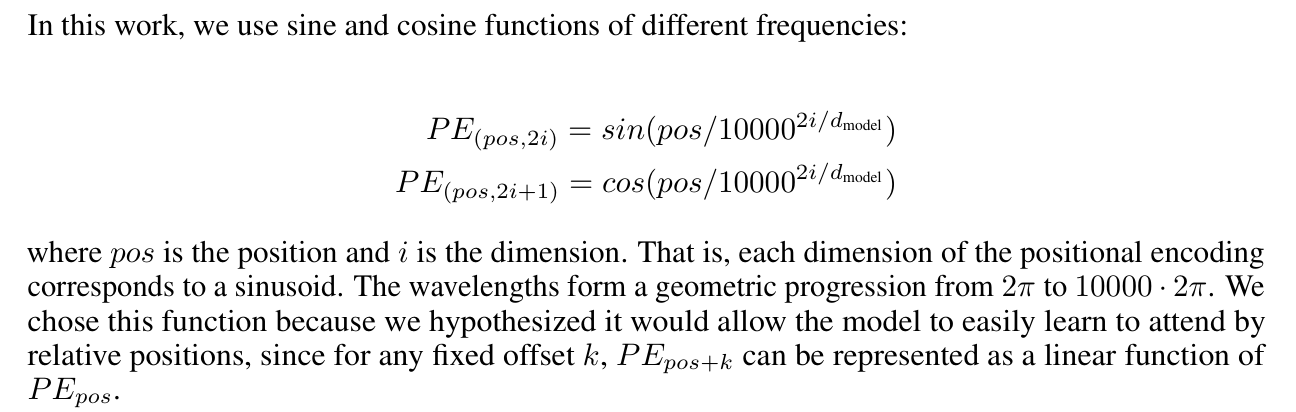

解释一下这里的Python代码：
- `np.arange`：生成一组连续的整数索引，表示序列中的每个位置和嵌入向量的每个维度
  - `np.arange(seq_length)[:, np.newaxis]`：生成序列位置索引，形状 (seq_length, 1)，比如[[0],[1],[2]]
  - `np.arange(embed_dim)[np.newaxis, :],`：生成嵌入维度索引，形状 (1, embed_dim)，比如[[0, 1, 2, 3]]
  - 上面两个数组可以broadcast成一个二维网格，方便后面计算每个位置和每个维度的角度angle
- `np.newaxis`：增加数组为度，在数组给定位置加一个新的维度(用于升维)，本质上等价于None
- `angle_rads[:, 0::2]`：对所有行，取偶数列（从第0列开始，每隔2列取一个）。
- `angle_rads[:, 1::2]`：对所有行，取奇数列（从第1列开始，每隔2列取一个）。

In [24]:
# np.newaxis
a = np.array([1,2,3])
print(a[:, np.newaxis], "\n Shape: ", a[:, np.newaxis].shape)
print(a[np.newaxis, :], "\n Shape: ", a[np.newaxis, :].shape)

a = np.array([[1, 2], [3, 4]])
print("Original shape: ", a.shape)  # (2, 2)
b = a[np.newaxis, ...]
print("New shape", b.shape)  # (1, 2, 2)
print("Axis-added array: \n", b)

[[1]
 [2]
 [3]] 
 Shape:  (3, 1)
[[1 2 3]] 
 Shape:  (1, 3)
Original shape:  (2, 2)
New shape (1, 2, 2)
Axis-added array: 
 [[[1 2]
  [3 4]]]


## 4. Compile the model

In [ ]:
# Hyperparameters 
embed_dim = 256 
num_heads = 4 
ff_dim = 512 
num_layers = 4 

# Build the Transformer model 
model = TransformerModel(vocab_size, embed_dim, num_heads, ff_dim, num_layers, seq_length)

# Provide input shape to build the model by passing a dummy input with maxval specified
# Use a random input as a test to determine the shape of input/output and initialize all the parameters
# Or, we may not be able to get correct parameter info using model.summary()
_ = model(tf.random.uniform((1, seq_length), maxval=vocab_size, dtype=tf.int32))

# Compile the model 
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

# Summary of the model 
model.summary()


Model: "transformer_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (1, 100, 256)          │     2,560,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_block               │ ?                      │     1,315,840 │
│ (TransformerBlock)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_block_1             │ ?                      │     1,315,840 │
│ (TransformerBlock)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_block_2             │ ?                      │     1,315,840 │
│ (TransformerBlock)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_block_3             │ ?                      │     1,315,840 │
│ (TransformerBlock)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (1, 100, 10000)        │     2,570,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,393,360 (39.65 MB)

 Trainable params: 10,393,360 (39.65 MB)

 Non-trainable params: 0 (0.00 B)

## 5. Train the model
- Train the TransformerModel on the input and target seq
- Plot the training loss to monitor the model's performance over epochs

In [13]:
X = X[:10000]
Y = Y[:10000]

print(X)

tf.Tensor(
[[  89  270  138 ...   39   60   58]
 [ 270  138   36 ...   60   58  573]
 [ 138   36  982 ...   58  573   79]
 ...
 [  39   34   40 ...  146   15 1285]
 [  34   40 1410 ...   15 1285 6282]
 [  40 1410   76 ... 1285 6282    2]], shape=(10000, 100), dtype=int64)


Epoch 1/4
313/313 ━━━━━━━━━━━━━━━━━━━━ 158s 504ms/step - loss: 11.0257
Epoch 2/4
313/313 ━━━━━━━━━━━━━━━━━━━━ 164s 524ms/step - loss: 11.0389
Epoch 3/4
313/313 ━━━━━━━━━━━━━━━━━━━━ 177s 566ms/step - loss: 11.0356


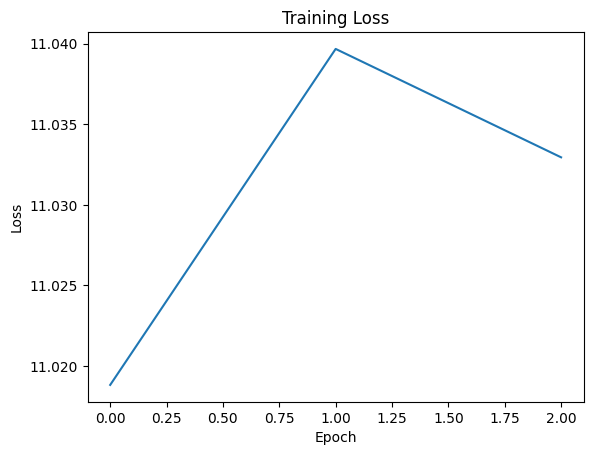

In [26]:
# Import necessary libraries for training visualization
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping callback to stop training if the loss doesn't improve
early_stopping = EarlyStopping(monitor='loss', patience=2, restore_best_weights=True)

# Train the transformer model on the full input and target sequences
history = model.fit(X, Y, epochs=4, batch_size=32, callbacks=[early_stopping])

# Plot training loss to monitor model performance over epochs
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()


In [27]:
tf.config.list_physical_devices('GPU')

[]

In [28]:
tf.__version__

'2.17.1'